#### Import all useful libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [46]:
%matplotlib notebook

In [22]:
plt.style.use('ggplot')

#### 1. Read from data file 

In [3]:
df = pd.read_csv('NY_FL_flight_demand.csv')

#### 2. Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694917 entries, 0 to 694916
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   search_date          694917 non-null  object
 1   origin_airport_code  694917 non-null  object
 2   origin_city          694917 non-null  object
 3   origin_region        694917 non-null  object
 4   origin_country       694917 non-null  object
 5   dest_airport_code    694917 non-null  object
 6   destination_city     694917 non-null  object
 7   destination_region   694917 non-null  object
 8   destination_country  694917 non-null  object
 9   flight_demand        694917 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 53.0+ MB


In [5]:
"""
Find out time duration of data collection
"""
print('Start Date: {0} \nEnd Date: {1}'.format(df['search_date'].min(),df['search_date'].max()))

Start Date: 2016-03-01 
End Date: 2018-03-31


In [6]:
"""
Lets take a peek 
"""
df.head()

,search_date,origin_airport_code,origin_city,origin_region,origin_country,dest_airport_code,destination_city,destination_region,destination_country,flight_demand
0,2016-06-05,ECP,Panama City,FL,US,DEN,Denver,CO,US,135
1,2016-06-05,MIA,Miami,FL,US,BOS,Boston,MA,US,3909
2,2016-06-05,PGD,Punta Gorda,FL,US,JFK,New York,NY,US,15
3,2016-06-05,JAX,Jacksonville,FL,US,WAS,Washington,DC,US,943
4,2016-06-05,EYW,Key West,FL,US,CLT,Charlotte,NC,US,67


In [7]:
"""
Pandas has parsed 'search_date' column as string not datetime, lets remedy that
"""
print("Default dtype: ",type(df['search_date'][0]))
print("Modified dtype: ",type(pd.to_datetime(df['search_date'][0])))



Default dtype:  <class 'str'>
Modified dtype:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
"""
Converting to datetime will be useful for further operations
"""
df['search_date'] = pd.to_datetime(df['search_date'])
print("Start Date: {0} \nEnd Date: {1}".format(df['search_date'].min(),df['search_date'].max()))

Start Date: 2016-03-01 00:00:00 
End Date: 2018-03-31 00:00:00


In [19]:
"""
Lets analyze the entropy of each column 
Observations: 
1. All flights are domestic
2. Some cities (likely large) have more than one airport
"""
print("Flights originating from {}".format(pd.unique(df['origin_region'])))
print("Flights destined for {}".format(pd.unique(df['destination_region'])))

Flights originating from ['FL' 'NY']
Flights destined for ['CO' 'MA' 'NY' 'DC' 'NC' 'MI' 'MD' 'AZ' 'WA' 'CA' 'TX' 'IL' 'MN' 'PA'
 'NV' 'NJ' 'OH' 'GA' 'LA' 'TN' 'FL' 'HI']


### 1. Looking at some seasonal patterns across years | region of origin

In [20]:
"""
Quick operation to create some dated categorical variables
"""
df.set_index(df['search_date'], inplace=True)
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df.reset_index(inplace=True,drop=True)

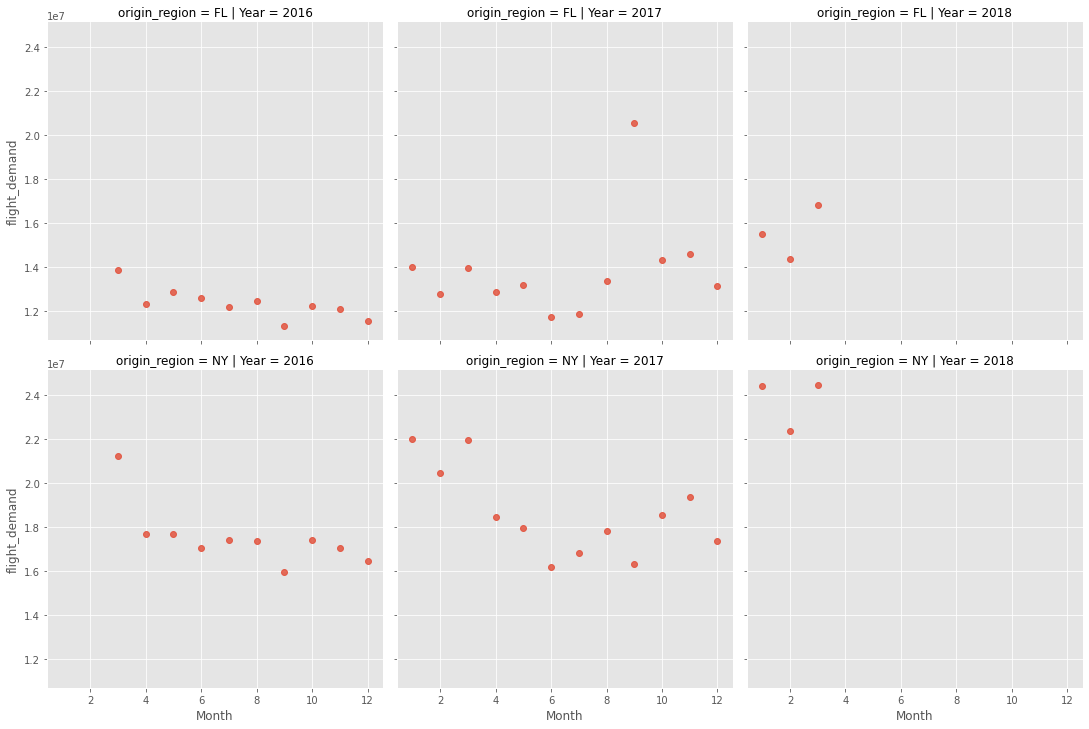

In [23]:
sns.lmplot(data=df.groupby(['origin_region','Year','Month']).sum().reset_index(),
           col='Year',row='origin_region',x='Month',y='flight_demand', fit_reg=False)
plt.show()

### Finding popular destinations 

<IPython.core.display.Javascript object>


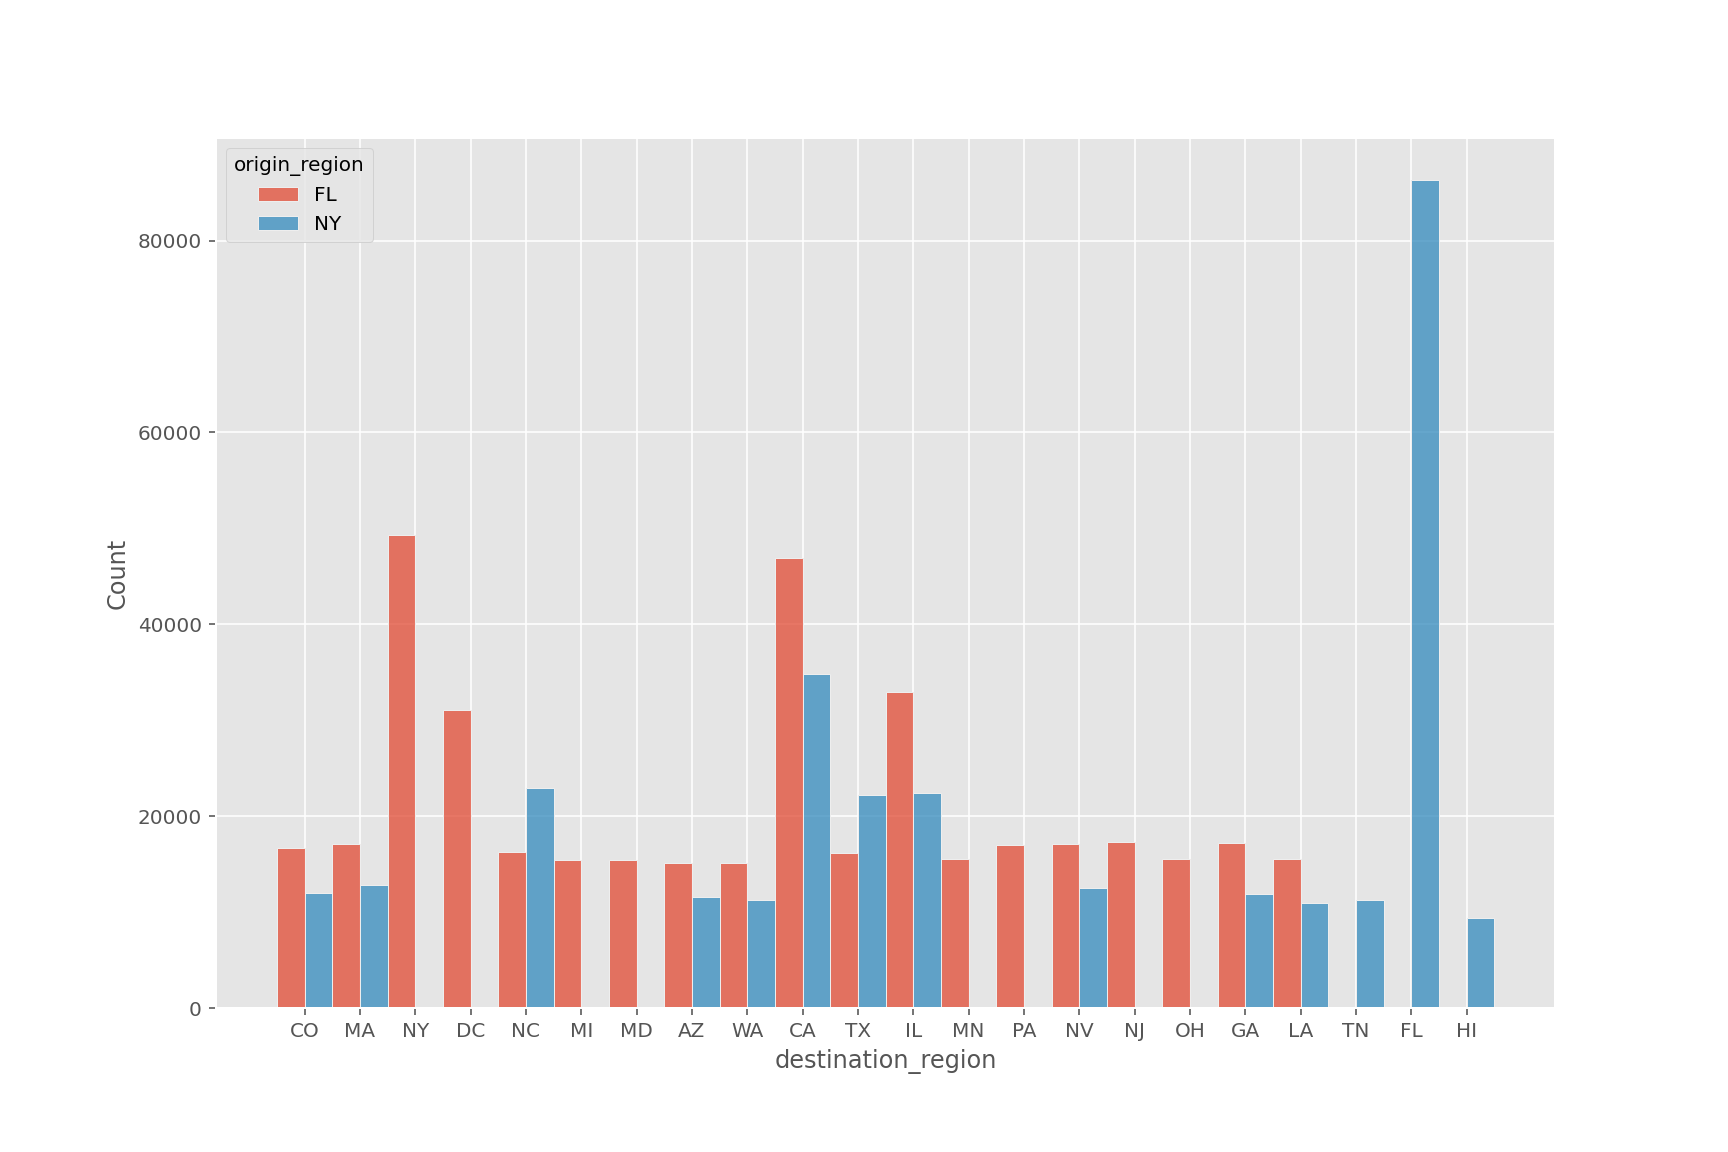

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(data = df,
             hue = 'origin_region', x = 'destination_region',
             multiple='dodge')
plt.show()

In [76]:
temp  = df.groupby(['origin_region','Year','destination_region'])['count'].count().reset_index()
# temp['count'] = np.log(temp['count'])/np.log(1.2)

<IPython.core.display.Javascript object>


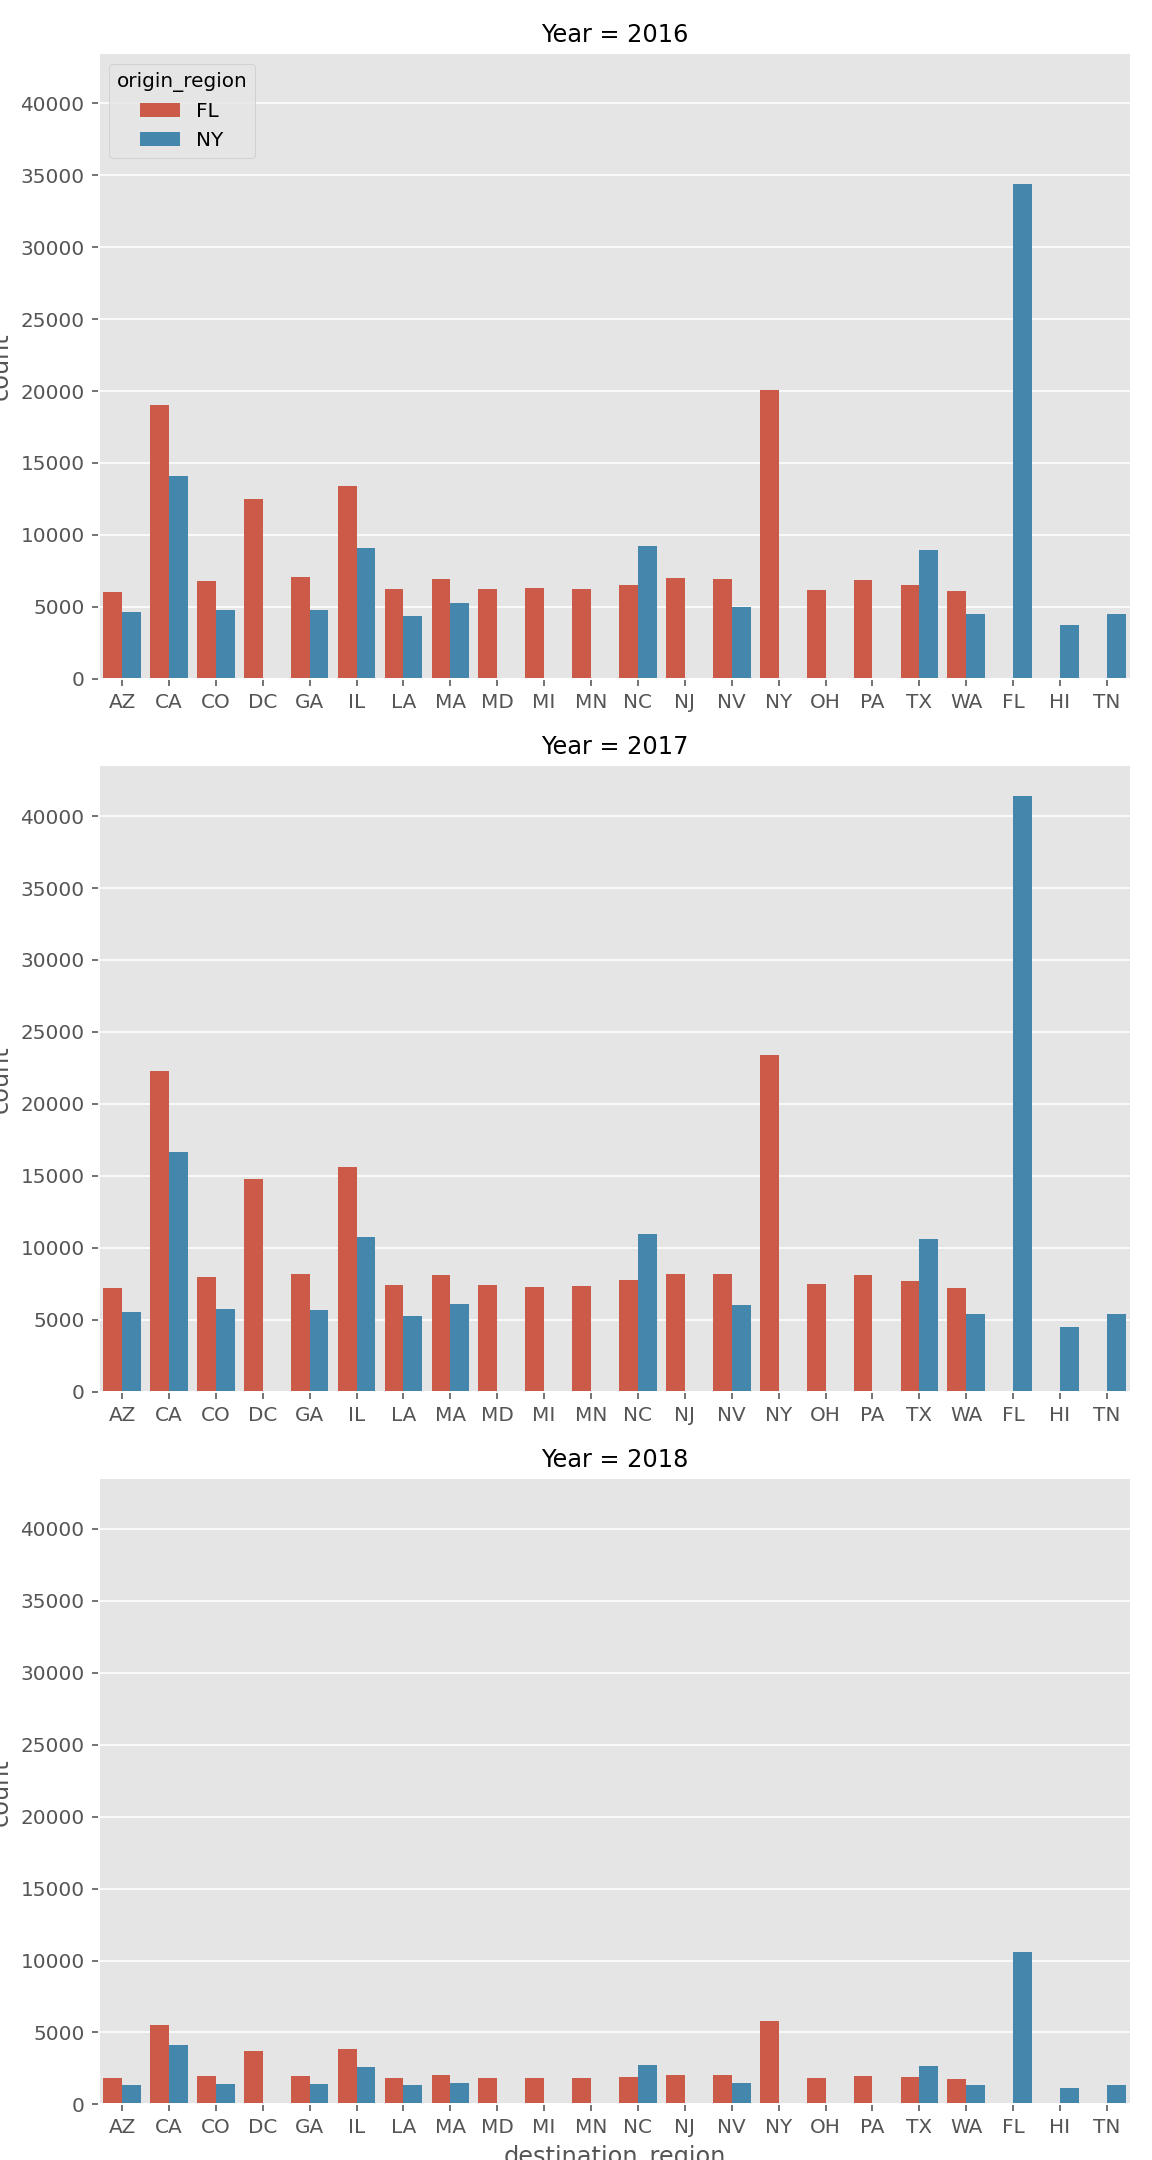

In [79]:
sns.catplot(x='destination_region',y='count',hue='origin_region',
           row='Year', data=temp, kind='bar', aspect=1.6,
           sharex=False, legend_out=False)
plt.show()

AssertionError: one equals two